In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 

#import numpy as np 
#import os
#plt.rcParams["figure.figsize"] = (20,10)
#plt.rcParams.update({'font.size': 20})

In [7]:
data = pd.read_csv('Student_performance_data _.csv')

In [5]:
#create a barpartite network
B = nx.Graph()

In [10]:
print(data.columns)


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


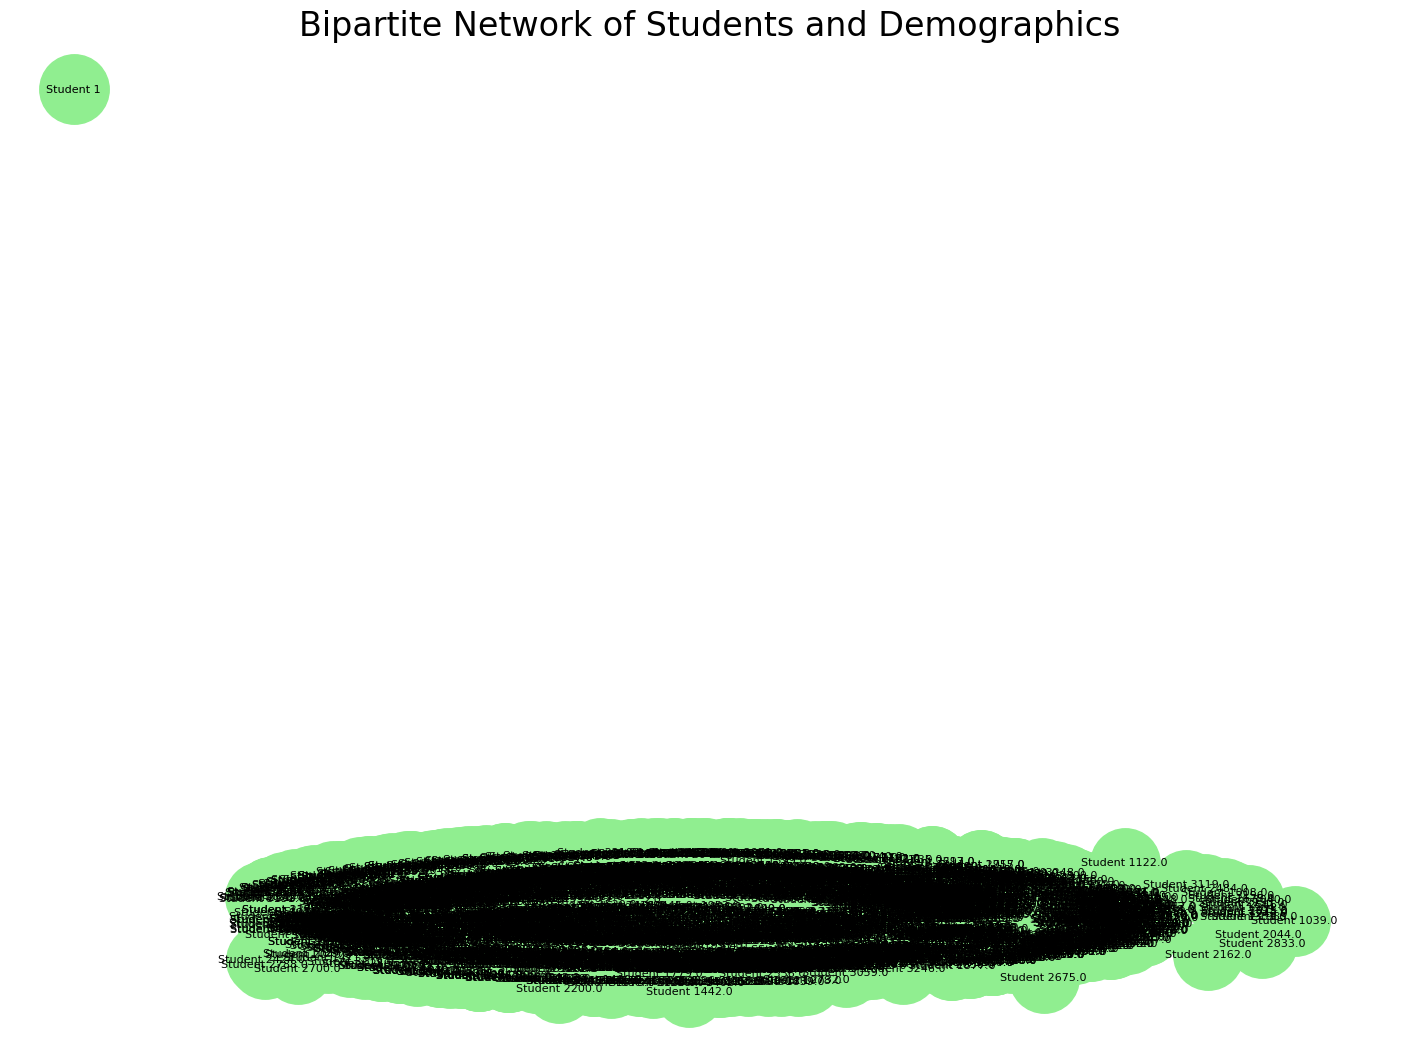

In [14]:
for index, row in data.iterrows():
    student_node = f"Student {row['StudentID']}"
    B.add_node(student_node, bipartite=0)  

    B.add_node(row['Gender'], bipartite=1)  
    B.add_node(row['Ethnicity'], bipartite=1)  
    B.add_node(row['ParentalEducation'], bipartite=1)  
    B.add_node(row['Tutoring'], bipartite=1)  
    B.add_node(row['ParentalSupport'], bipartite=1) 
    
    B.add_edge(student_node, row['Gender'])
    B.add_edge(student_node, row['Ethnicity'])
    B.add_edge(student_node, row['ParentalEducation'])
    B.add_edge(student_node, row['Tutoring'])
    B.add_edge(student_node, row['ParentalSupport'])

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(B, seed=42)  
nx.draw(B, pos, with_labels=True, node_size=2500, node_color='lightgreen', font_size=8, font_color='black', edge_color='gray')

plt.title('Bipartite Network of Students and Demographics')
plt.show()